<div style="width:100%;height:100px;text-align:center;border: 4px solid black;background-color:#E6BF00;color:white">

<header style="width:100%;height:100px;">
  <h1><b> Session 003</b></h1>
    <h4> Basic Natural language processing </h4>
</header>

<div> 

<div style='border: 4px solid #E6BF00;padding:9px;'>

By: Farhad Shadmand 
    
https://github.com/farhadsh1992
    
</div>

<div style="border: 4px solid #3550B7;background-color:#BFE6FF;color:black;border-radius: 5px;padding:7px">
  <strong> Refrence: </strong><br>



http://nadbordrozd.github.io/blog/2016/05/20/text-classification-with-word2vec/
  
https://towardsdatascience.com/using-scikit-learn-to-find-bullies-c47a1045d92f
    
https://www.kaggle.com/eswarbabu88/toxic-comment-glove-logistic-regression
    
https://www.kaggle.com/stacykurnikova/using-glove-embedding
    
https://www.kaggle.com/ankitswarnkar/word-embedding-using-glove-vector
    
https://textminingonline.com/getting-started-with-word2vec-and-glove-in-python
    
https://markhneedham.com/blog/2018/05/19/interpreting-word2vec-glove-embeddings-sklearn-neo4j-graph-algorithms/
    
http://nadbordrozd.github.io/blog/2016/05/20/text-classification-with-word2vec/
    
https://radimrehurek.com/gensim/sklearn_api/w2vmodel.html
    
https://www.kaggle.com/reiinakano/basic-nlp-bag-of-words-tf-idf-word2vec-lstm
    
</div>

<div style="width:100%;height:70px;border: 4px solid black;background-color:#E6BF00;color:white;text-align:center;border-radius: 25px;padding:3px">
    <h1>  Result of ML <h1>
</div>

In [53]:
df_re = pd.DataFrame(result)
df_re.sort_values('cross_validation_train').head(len(df_re))

,title,cross_validation_train,accuracy_test
2,XGBRegressor,-0.025863,0.494681
4,GaussianNB,0.483120,0.515957
5,DecisionTreeClassifier,0.497763,0.453901
0,LogisticRegression,0.501331,0.524823
6,LinearSVC,0.501774,0.526596
1,ExtraTreesClassifier,0.507985,0.505319
3,KNeighborsClassifier,0.509321,0.494681


<div style="width:100%;height:70px;border: 4px solid black;background-color:#E6BF00;color:white;text-align:center;border-radius: 25px;padding:3px">
    <h1>  Load data <h1>
</div>

In [2]:
import numpy as np
import pandas as pd
import re

In [3]:
data_path = '/Users/apple/Documents/Programming/python/Project/data/Clean_tweets/2Tesla_label_from_2010-06-29_to_2019-02-26_2019227.csv'
#data_path = '/Users/apple/Documents/Programming/python/Project/data/tweets/clean01.training.1600000.processed.noemoticon.csv'
df_data = pd.read_csv(data_path)
df_data = df_data.dropna().reset_index()
def xx(x):
    if x==-1:
        return 0
    else:
        return x
#df_data['Price_label(0,1)'] = df_data['Price_label(0,1)'].apply(xx)
df_data['clean_text'] = df_data['clean_text'].apply(lambda x: re.sub('-PRON- ','',x))
df_data = df_data.reindex()
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2816 entries, 0 to 2815
Data columns (total 4 columns):
index               2816 non-null int64
created_at          2816 non-null object
clean_text          2816 non-null object
Price_label(0,1)    2816 non-null int64
dtypes: int64(2), object(2)
memory usage: 88.1+ KB


In [5]:
def labelx(x):
    if x==-1:
        return 0
    else:
        return 1
df_data['label'] = df_data['Price_label(0,1)'].apply(labelx)

In [6]:
df_data.head(2)

,index,created_at,clean_text,"Price_label(0,1)",label
0,1,2010-06-29,trump tusk tesla,1,1
1,2,2010-06-29,tesla elon musk may trouble e c want hold cont...,1,1


In [4]:
df_data.groupby('Price_label(0,1)').sum()

,index
"Price_label(0,1)",
-1,2190599
1,2316672


In [37]:
result = {}
result['title'] = []
result['cross_validation_train'] = []
result['accuracy_test'] = []

def result_maker(title,scoe,acc):
    result['title'].append(title)
    result['cross_validation_train'].append(scoe.mean())
    result['accuracy_test'].append(acc)

<div style="width:100%;height:70px;border: 4px solid black;background-color:#E6BF00;color:white;text-align:center;border-radius: 25px;padding:3px">
    <h1> Embedding <h1>
</div>

In [7]:
from farhad.TextAwsome import Text_Embadding

In [8]:
glove_model = Text_Embadding(df_data.clean_text)   # df_data.text
glove_model.Glove_datastories_twitter_50d()
data_ET50d = glove_model.data2vec()  

Found 658125 word vectors.
Lenght of data: 2816
lenght of features: 50


<div style="width:100%;height:70px;border: 4px solid black;background-color:#E6BF00;color:white;text-align:center;border-radius: 25px;padding:3px">
    <h1> model_selection <h1>
</div>

In [15]:
x = data_ET50d 
y = [i for i in df_data['label']]

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test  = train_test_split(x,y ,test_size=0.20, random_state =32, shuffle=True)

print(y_train[1:10])
print(x_train[0])

[1, 0, 1, 1, 1, 1, 1, 1, 0]
[-0.04597766  0.07539941 -0.11853474  0.06086664  0.00437364 -0.15323256
 -0.07096647  0.019163   -0.00217626  0.03498755  0.8659479   0.15342885
  0.0010515  -0.02132238 -0.00348689  0.03577081  0.08855181 -0.02612059
 -0.05681206  0.06792792 -0.13454774 -0.02360017 -0.01035048  0.03358279
  0.07251479  0.01828674  0.06607767  0.0800916   0.10152822 -0.06324047
 -0.04651728  0.00981357  0.02463498 -0.12467019 -0.0496133   0.12678285
  0.15322238  0.01161223  0.05195683  0.13417256  0.03942168  0.09426782
 -0.02787039  0.0645655  -0.0466336  -0.04825658  0.00101609  0.01967828
 -0.02538835  0.00615802]


<div style="width:100%;height:70px;border: 4px solid black;background-color:#E6BF00;color:white;text-align:center;border-radius: 25px;padding:3px">
    <h1> LogisticRegression <h1>
</div>

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix, log_loss, f1_score,mean_squared_error
from farhad_DL.utility import plot_confusion_matrix 
from sklearn.model_selection import train_test_split, cross_val_score

accuracy: 0.5013313624045331
accuracy: 0.524822695035461


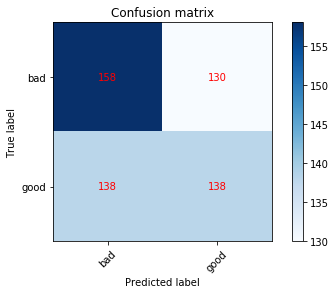

In [38]:
classifier = LogisticRegression(solver='sag')

scoe = cross_val_score(classifier,x_train, y_train , cv=5);
print('accuracy:',scoe.mean())


classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

acc = accuracy_score(y_test,y_pred)
print('accuracy:',acc)

cm = confusion_matrix(y_test,y_pred , labels=[0,1])
plot_confusion_matrix(cm, names=['bad','good'])

In [39]:
title = 'LogisticRegression'
result_maker(title,scoe,acc)

<div style="width:100%;height:70px;border: 4px solid black;background-color:#E6BF00;color:white;text-align:center;border-radius: 25px;padding:3px">
    <h1> ExtraTreesClassifier <h1>
</div>

In [20]:
from sklearn.ensemble import ExtraTreesClassifier

accuracy: 0.5079852180339984
accuracy: 0.5053191489361702


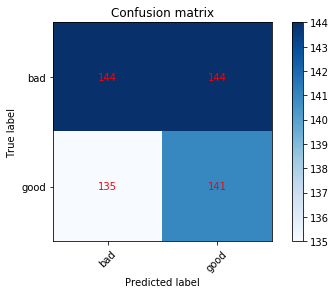

In [40]:
ETC = ExtraTreesClassifier(n_estimators=200)

scoe = cross_val_score(ETC,x_train, y_train , cv=5);
print('accuracy:',scoe.mean())


ETC.fit(x_train, y_train)
y_pred = ETC.predict(x_test)

acc = accuracy_score(y_test,y_pred)
print('accuracy:',acc)

cm = confusion_matrix(y_test,y_pred , labels=[0,1])
plot_confusion_matrix(cm, names=['bad','good'])

In [41]:
title = 'ExtraTreesClassifier'
result_maker(title,scoe,acc)

<div style="width:100%;height:70px;border: 4px solid black;background-color:#E6BF00;color:white;text-align:center;border-radius: 25px;padding:3px">
    <h1> XGBRegressor <h1>
</div>

In [24]:
from sklearn.model_selection import train_test_split, cross_val_score

accuracy: -0.02586252021166402
accuracy: 0.4946808510638298


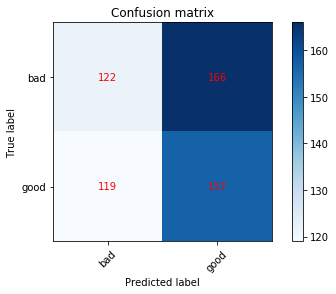

In [42]:
from xgboost import XGBRegressor

model_xgb_Regressor = XGBRegressor(n_estimators=60,early_stopping_rounds='auto',verbose=True,random_state=10)

scoe = cross_val_score(model_xgb_Regressor,x_train, y_train , cv=5);
print('accuracy:',scoe.mean())

model_xgb_Regressor.fit(x_train, y_train)
y_pred = model_xgb_Regressor.predict(x_test)
for num in range(len(y_pred)):
    if y_pred[num]>0.50:
        y_pred[num]=1
    else:
         y_pred[num]=0
            

acc = accuracy_score(y_test,y_pred)
print('accuracy:',acc)

cm = confusion_matrix(y_test,y_pred , labels=[0,1])
plot_confusion_matrix(cm, names=['bad','good'])

In [43]:
title = 'XGBRegressor'
result_maker(title,scoe,acc)

<div style="width:100%;height:70px;border: 4px solid black;background-color:#E6BF00;color:white;text-align:center;border-radius: 25px;padding:3px">
    <h1> KNeighborsClassifier <h1>
</div>

accuracy: 0.5093205222961321
accuracy: 0.4946808510638298


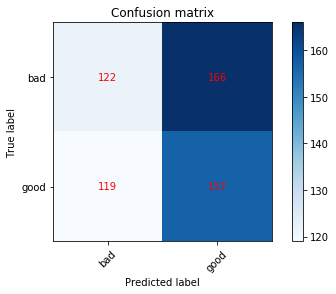

In [44]:
from sklearn.neighbors import KNeighborsClassifier
kmean = KNeighborsClassifier()
scoe = cross_val_score(kmean, x_train, y_train , cv=5);
print('accuracy:',scoe.mean())

kmean.fit(x_train, y_train)
y_pred = model_xgb_Regressor.predict(x_test)
for num in range(len(y_pred)):
    if y_pred[num]>0.50:
        y_pred[num]=1
    else:
         y_pred[num]=0
            
acc = accuracy_score(y_test,y_pred)
print('accuracy:',acc)

cm = confusion_matrix(y_test,y_pred , labels=[0,1])
plot_confusion_matrix(cm, names=['bad','good'])

In [45]:
title = 'KNeighborsClassifier'
result_maker(title,scoe,acc)

<div style="width:100%;height:70px;border: 4px solid black;background-color:#E6BF00;color:white;text-align:center;border-radius: 25px;padding:3px">
    <h1> GaussianNB <h1>
</div>

accuracy: 0.483119980290712
accuracy: 0.5159574468085106


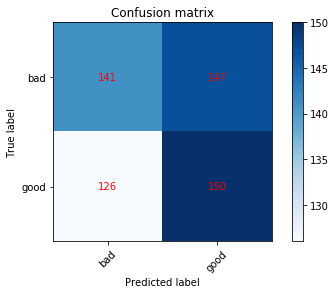

In [46]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(x_train, y_train)
scoe = cross_val_score(GNB, x_train, y_train , cv=5);
print('accuracy:',scoe.mean())

GNB.fit(x_train, y_train)
y_pred = GNB.predict(x_test)
for num in range(len(y_pred)):
    if y_pred[num]>0.50:
        y_pred[num]=1
    else:
         y_pred[num]=0
            
acc = accuracy_score(y_test,y_pred)
print('accuracy:',acc)

cm = confusion_matrix(y_test,y_pred , labels=[0,1])
plot_confusion_matrix(cm, names=['bad','good'])

In [47]:
title = ' GaussianNB'
result_maker(title,scoe,acc)

<div style="width:100%;height:70px;border: 4px solid black;background-color:#E6BF00;color:white;text-align:center;border-radius: 25px;padding:3px">
    <h1> DecisionTreeClassifier <h1>
</div>

accuracy: 0.4977629958117763
accuracy: 0.45390070921985815


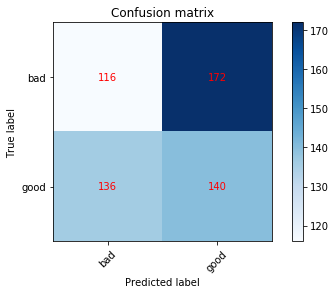

In [48]:
from sklearn.tree import DecisionTreeClassifier
model_DecisionTree = DecisionTreeClassifier(max_leaf_nodes=300)
scoe = cross_val_score(model_DecisionTree, x_train, y_train , cv=5);
print('accuracy:',scoe.mean())

model_DecisionTree.fit(x_train, y_train)
y_pred = model_DecisionTree.predict(x_test)
for num in range(len(y_pred)):
    if y_pred[num]>0.50:
        y_pred[num]=1
    else:
         y_pred[num]=0
            
acc = accuracy_score(y_test,y_pred)
print('accuracy:',acc)

cm = confusion_matrix(y_test,y_pred , labels=[0,1])
plot_confusion_matrix(cm, names=['bad','good'])

In [49]:
title = 'DecisionTreeClassifier'
result_maker(title,scoe,acc)

<div style="width:100%;height:70px;border: 4px solid black;background-color:#E6BF00;color:white;text-align:center;border-radius: 25px;padding:3px">
    <h1> LinearSVC <h1>
</div>

accuracy: 0.5017738359201773
accuracy: 0.526595744680851


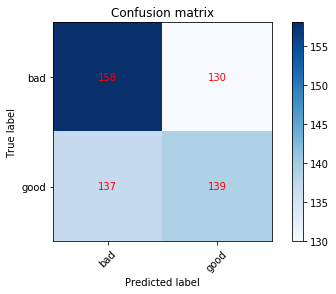

In [50]:
from sklearn.svm import LinearSVC
LSVC = LinearSVC()

scoe = cross_val_score(LSVC, x_train, y_train , cv=5);
print('accuracy:',scoe.mean())

LSVC.fit(x_train, y_train)
y_pred = LSVC.predict(x_test)
for num in range(len(y_pred)):
    if y_pred[num]>0.50:
        y_pred[num]=1
    else:
         y_pred[num]=0
            
acc = accuracy_score(y_test,y_pred)
print('accuracy:',acc)

cm = confusion_matrix(y_test,y_pred , labels=[0,1])
plot_confusion_matrix(cm, names=['bad','good'])

In [51]:
title = ' LinearSVC'
result_maker(title,scoe,acc)